In [1]:
import os, sys, time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [8]:
df = pd.read_csv("./data/train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.shape

(7613, 5)

In [10]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [14]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [16]:
df.isna().mean().sort_values()

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

<Axes: >

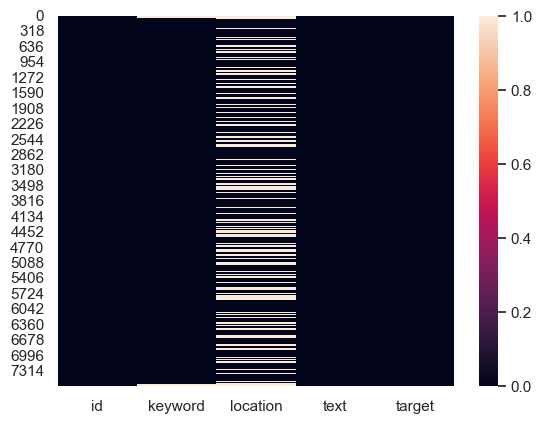

In [17]:
sns.heatmap(df.isna())

In [18]:
df.duplicated().sum()

0

In [19]:
df.duplicated(subset="text").sum()

110

In [23]:
for col in df.columns:
    print(f"{col} =",df.duplicated(subset=col).sum())

id = 0
keyword = 7391
location = 4271
text = 110
target = 7611


In [26]:
idx = df.duplicated(subset="text", keep="first")
df.loc[idx,:].sort_values("text")

,id,keyword,location,text,target
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...,...
3461,4952,exploded,NaN,that exploded &amp; brought about the\nbeginni...,0
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve be...,1


## Inspection

In [27]:
df.describe(include=np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [28]:
df.describe(include=object)

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


## Cleaning

In [30]:
tmp = df.dtypes
tmp

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [31]:
cols = ["text", "target"]
df = df[cols]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## Drop NAN

In [32]:
df.isna().mean()

text      0.0
target    0.0
dtype: float64

## Duplicated

In [33]:
df.shape

(7613, 2)

In [36]:
idx = df.duplicated(subset="text", keep="first")
df.loc[idx,:].sort_values("text")

,text,target


In [35]:
df.drop_duplicates(subset="text", inplace=True)

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_10852/2880993212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset="text", inplace=True)


# Exploratory Data Analysis

## Target

In [37]:
df.describe()

,target
count,7503.000000
mean,0.426230
std,0.494561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [38]:
df.target.value_counts()

0    4305
1    3198
Name: target, dtype: int64

In [39]:
df.target.value_counts(normalize=True)

0    0.57377
1    0.42623
Name: target, dtype: float64

<Axes: ylabel='target'>

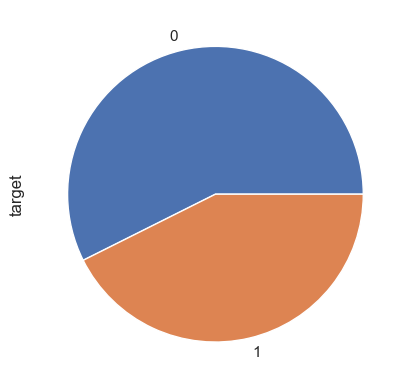

In [41]:
df.target.value_counts().plot(kind="pie")

## Length

In [43]:
df.describe(include="object")

,text
count,7503
unique,7503
top,Our Deeds are the Reason of this #earthquake M...
freq,1


In [44]:
df.text.apply(lambda i : len(i))

0        69
1        38
2       133
3        65
4        88
       ... 
7604    136
7605    114
7606    121
7608     83
7612     94
Name: text, Length: 7503, dtype: int64

<Axes: >

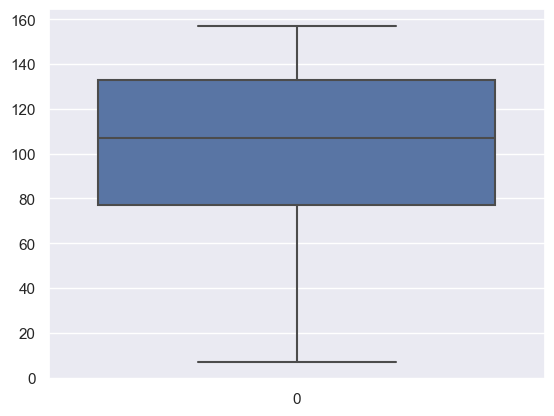

In [45]:
tmp = df.text.str.len()
sns.boxplot(tmp)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


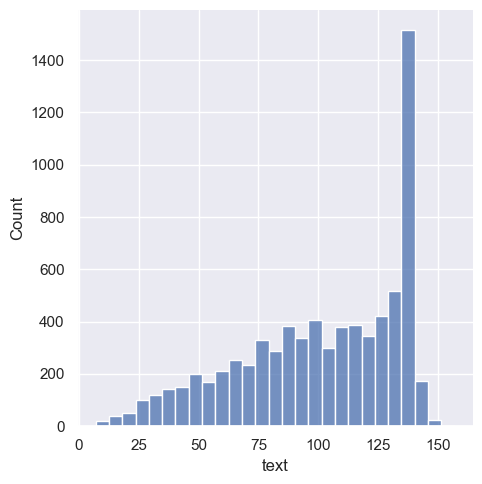

In [46]:
sns.displot(tmp)

In [48]:
df["_len_txt"] = tmp
df.head()

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_10852/537075328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_len_txt"] = tmp


,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


## Multivariate analysis

In [49]:
corr = df.corr()
corr

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_10852/2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,target,_len_txt
target,1.000000,0.180997
_len_txt,0.180997,1.000000


<Axes: >

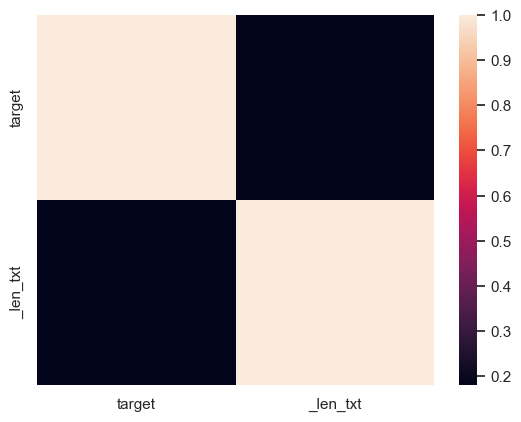

In [50]:
sns.heatmap(corr)

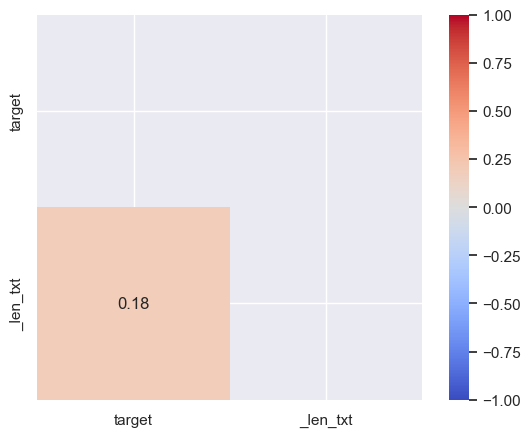

In [52]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fix, ax = plt.subplots(1,1, figsize=(7,5))
sx = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


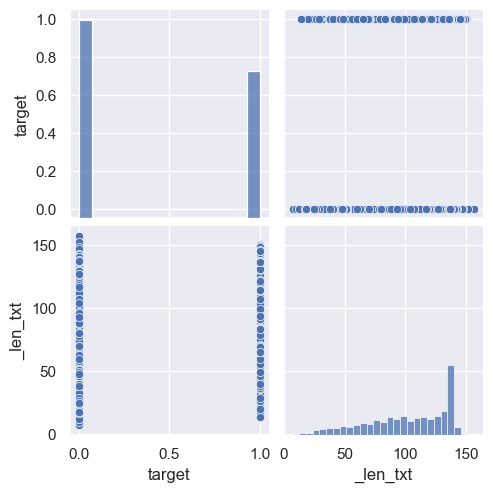

In [53]:
sns.pairplot(df)

In [55]:
# Not working
# sns.pairplot(df, hue="target")

In [56]:
df.sort_values("_len_txt").head(10)

,text,target,_len_txt
4890,Bad day,0,7
5115,Err:509,0,7
1882,Crushed,0,7
4971,Meltdown,0,8
24,LOOOOOOL,0,8
3670,fatality,0,8
30,The end!,0,8
28,Cooool :),0,9
3667,Fatality!,0,9
6705,Thunder???,0,10


In [57]:
df.sort_values("_len_txt").tail(10)

,text,target,_len_txt
261,@Barbi_Twins We need help-horses will die! Ple...,0,148
2301,Nah but srsly b4 u demolish ur partner's face ...,0,148
6945,@helene_yancey GodsLove &amp; #thankU my siste...,1,148
257,@willienelson We need help! Horses will die!Pl...,1,148
2718,@UN No more #GujaratRiot &amp; #MumbaiRiot92-9...,1,149
635,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
633,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
614,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151
4801,It's was about 2:30 in the morning&amp;I went ...,0,152
1270,when you're taking a shower and someone flushe...,0,157


In [58]:
df.drop(columns="_len_txt", inplace=True)
df.head()

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_10852/3619034452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="_len_txt", inplace=True)


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [59]:
df.to_csv("./data/df_cleaned.csv", index=False)

## Explore corpus and documents
### print N random documents

In [61]:
df_samp = df.sample(290)
df_samp

,text,target
1436,'Become another casualty of society',0
6452,@NBCPolitics RUSSIA AND THAT BACK FIRED NOW 20...,1
5034,@hazelannmac ooh now I feel guilty about wishi...,0
82,Can wait to see how pissed Donnie is when I te...,0
6361,@FoxNewsInsider All Obama is doing is giving a...,0
...,...,...
271,U.S National Park Services Tonto National Fore...,1
3165,@chowtaxis of Newport a big thanks for the eme...,1
606,FedEx no longer to transport bioterror germs i...,0
1534,THE CHEMICAL BROTHERS to play The Armory in SF...,0


In [62]:
for idx, ser in df.iterrows():
    print(ser["text"])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...
Three people died from the heat wave so far
Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding
#raining #flooding #Florida 

In [65]:
for idx, ser in df.iterrows():
    txt_1 = f"target: {ser['target']}\n"
    print(txt_1 + ser['text'] + '...'+ "\n\n")

target: 1
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all...


target: 1
Forest fire near La Ronge Sask. Canada...


target: 1
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected...


target: 1
13,000 people receive #wildfires evacuation orders in California ...


target: 1
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ...


target: 1
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires...


target: 1
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas...


target: 1
I'm on top of the hill and I can see a fire in the woods......


target: 1
There's an emergency evacuation happening now in the building across the street...


target: 1
I'm afraid that the tornado is coming to our area......


target: 1
Three people died from the heat wave so fa

### Print documents vs target 

In [69]:
def print_sample(sub_df, n_sample=10):
    samp = sub_df.sample(n_sample)
    
    for idx, ser in samp.iterrows():
        txt_1 = f"target: {ser['target']}\n"
        print(txt_1 + ser['text'] + '...'+ "\n\n")

In [70]:
df_1 = df[df.target == 1]
df_1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [71]:
print_sample(df_1)

target: 1
The Murderous Story Of AmericaÛªs First Hijacking http://t.co/LK5uqKOP1e...


target: 1
@UnivSFoundation For the people who died in Human Experiments by Unit 731 of Japanese military http://t.co/vVPLFQv58P http://t.co/Rwaph6dAUv...


target: 1
@freeMurphy Your hot take on Canada's hitchhiking garbage-bot (destroyed in Philly) was sorely needed....


target: 1
@CorleoneDaBoss bc its risky and costly I don't see a need to do that when there isn't anything there. It's totally desolate....


target: 1
#RoddyPiperAutos Fears over missing migrants in Med: Rescuers search for survivors after a boat carrying as ma...  http://t.co/97B8AVgEWU...


target: 1
Destruction magic's fine just don't go burning down any buildings....


target: 1
Calgary pounded with hail on second day of storms https://t.co/2BE7BwcMpl...


target: 1
More Natural Disaster Research Urgent http://t.co/5Cm0LfZhxn via #JakartaPost...


target: 1
Just came back from camping and returned with a new song which gets r

In [74]:
df_0 = df[df.target == 0]
df_0.head()

,text,target
15,What's up man?,0
16,I love fruits,0
17,Summer is lovely,0
18,My car is so fast,0
19,What a goooooooaaaaaal!!!!!!,0


In [75]:
print_sample(df_0)

target: 0
This Friday!! Palm Beach County #Grindhouse Series one night screening of  #TexasChainsawMassacre http://t.co/1WopsGbVvv @morbidmovies...


target: 0
Navy sidelines 3 newest subs http://t.co/gpVZV0249Y...


target: 0
Emergency root canal!! #tookitlikeaman #lovemydentist #sore...


target: 0
Just added some more fire to the flames for Saturday! Rick Wonder will be spinning a guest set along with Chachi... http://t.co/Otblb9PJ2I...


target: 0
[Question] Is anybody else having this problem with the '7' circle in Epicentre? via /r/jailbreak http://t.co/48TPnmbJVG...


target: 0
cPanel Crash Course http://t.co/bIRKbje23e #course http://t.co/buZWJmW49e...


target: 0
@cjbanning 4sake of argsuppose pre-born has attained individl rights.Generally courtof law forbids killing unless dead person did something...


target: 0
@DavidVonderhaar if you loved me even a little youd put demolition in bo3...


target: 0
Brace yourself @samaritans by Sunday evening you will inundated with thousa